**Double click here and enter the student numbers for all minigroup members. Don't enter any names.**
1. **First student number**
2. **Second student number**
3. **Third student number.**

Before you start work on the project, **[click on this link to read the MATH0011 project instructions.](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html)**

This project is about discrete time [random walks](https://en.wikipedia.org/wiki/Random_walk).  They are heavily studied both for theoretical interest and for their applications in many real-world situations.  The project is a good choice for people interested in statistics and random processes and who want to learn more about random simulations and plotting in Python.

# Project 2 - Random Walks

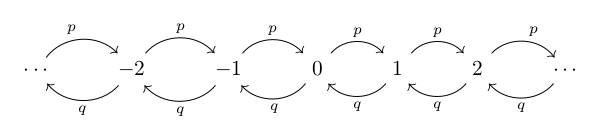

Suppose that I start at position 0 on the number line. Every second I either move to the right (with probability $p$) or to the left (with probability $q=1-p$).  How likely is it that I will ever visit position 0 again?  How far from 0 am I, on average, after $n$ seconds?  What if instead of walking on a line, I started at position $(0,0)$ in the plane and each second I moved one step north, south, east, or west randomly?
In this project you will study such one and two-dimensional *random walks*, plot their trajectories, and investigate mean distances from the origin.

The next cell imports some useful modules and configures `matplotlib` for use in a Jupyter notebook.

In [1]:
import math
import matplotlib.pyplot as plt
import scipy.stats
import random
import numpy as np

## Part 1



Consider a sequence $x_0, \ldots, x_m$ where $x_0= 0$ and 

$$x_{i+1} = \begin{cases} x_i + 1 & \text{with probability } p\\
x_i - 1 & \text{with probability } 1-p \end{cases}$$

**Write a function `random_walk(m, p)` which returns a list of values `[x0, x1, x2, ..., xm]` generated in this way.**

To generate an event with probability $p$ you could use [`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html), or [`numpy.random.binomial`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html) with `n = 1`, or [`random.random()`](https://docs.python.org/3.7/library/random.html#random.random) which produces a uniformly distributed random number in $[0,1)$, so the probability it is less than $p$ is $p$.

**Use `plt.plot` to plot the points $(i, x_i)$ for $0 \leq i \leq 1000$ where the $x_i$ are generated by `random_walk(1000, p)` for `p=0.5` and `p=0.7`** (on separate axes).

In [2]:
def random_walk(m, p):
    # your code goes here
    positions = [0]
    for i in range(m):
        if random.random() < p:
            step = 1
        else:
            step = -1
        positions.append(positions[-1] + step)
    return positions

Text(0, 0.5, '$x_i$')

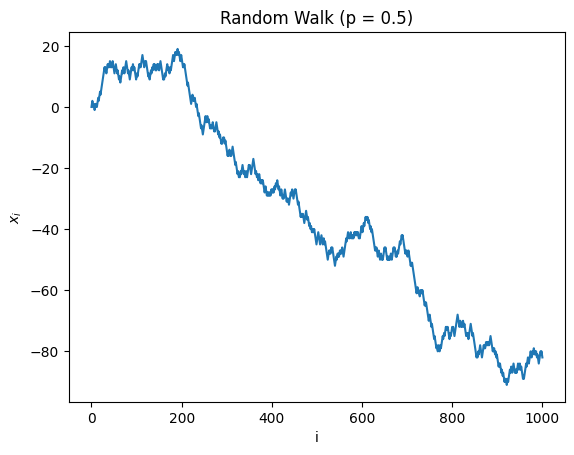

In [3]:
# plot the p=0.5 random walk in this cell

xs = np.linspace(0, 1000, 1001)
ys = random_walk(1000, 0.5)
plt.plot(xs, ys)
plt.title("Random Walk (p = 0.5)")
plt.xlabel("i")
plt.ylabel("$x_i$")

Text(0, 0.5, '$x_i$')

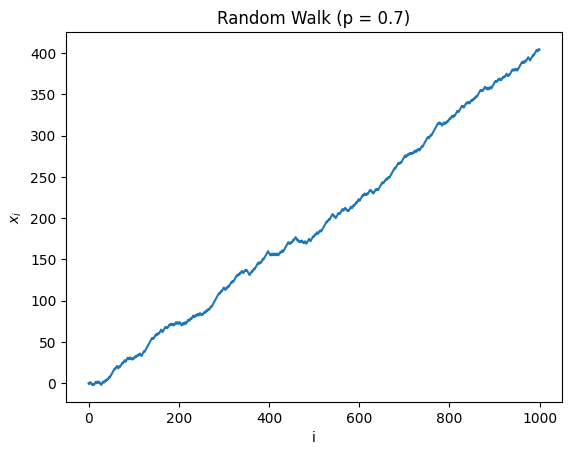

In [4]:
# plot the p=0.7 random walk in this cell

xs = np.linspace(0, 1000, 1001)
ys = random_walk(1000, 0.7)
plt.plot(xs, ys)
plt.title("Random Walk (p = 0.7)")
plt.xlabel("i")
plt.ylabel("$x_i$")

## Part 2

In this exercise you will estimate the probability that $x_i = 0$ for some $i>0$ in the random walk described in Exercise 1.  That is, you are estimating the probability the random walk ever revisits 0.

Write a program to generate 1000 different random walks with `m=2000` and outputs how many of those 1000 random walks ever revisit 0, divided by 1000 - this is an estimate of the probability of revisiting 0.  Do this for `p=0.5, p=0.6`, and `p=0.4`. You might find it helpful to re-use or modify the function you wrote in Exercise 1

In [5]:
def revisit_zero(m, p):
    count = 0
    for i in range(1000):
        if random_walk(m, p).count(0) >= 2: # the first element in the list is always zero
            count += 1
    return count / 1000

In [6]:
revisit_zero(2000, 0.5)

0.985

In [7]:
revisit_zero(2000, 0.6)

0.799

In [8]:
revisit_zero(2000, 0.4)

0.823

## Part 3

Now you are going to generate a random walk in two dimensions.  This will start at $(0,0)$ and at every step move north, south, east, or west each with probability $1/4$.  In other words you will generate a sequence $(x_i, y_i)$ such that $(x_0, y_0)=(0,0)$ and

$$ (x_{i+1}, y_{i+1}) = \begin{cases}
(x_i, y_i) + (0, 1) & \text{with probability } 1/4 \\
(x_i, y_i) + (0, -1) & \text{with probability } 1/4 \\
(x_i, y_i) + (1, 0) & \text{with probability } 1/4 \\
(x_i, y_i) + (-1, 0) & \text{with probability } 1/4. \end{cases}
$$

Generate a 1000-step 2d random walk and plot the points $(x_i, y_i)$, connecting each $(x_i,y_i)$ to $(x_{i+1}, y_{i+1})$ with a straight line.  You could use `plt.plot` for this, or the [turtle module](https://docs.python.org/3.3/library/turtle.html?highlight=turtle).

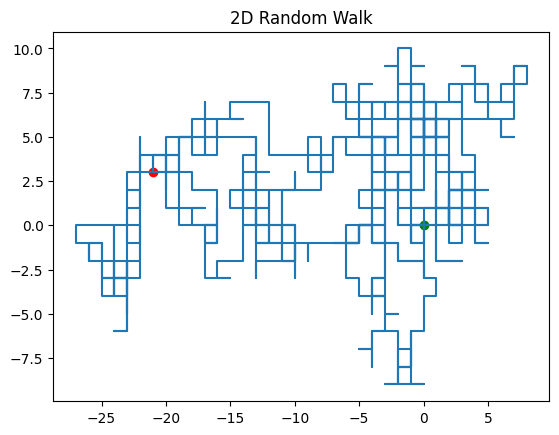

In [9]:
def random_walk_2d(n):
    x, y = 0, 0
    x_values, y_values = [x], [y]
    
    for i in range(n):
        step = random.choice(['N', 'S', 'E', 'W'])
        
        if step == 'N':
            y += 1
        elif step == 'S':
            y -= 1
        elif step == 'E': 
            x += 1
        else:
            x -= 1
            
        x_values.append(x)
        y_values.append(y)
        
    return x_values, y_values

x_vals, y_vals = random_walk_2d(1000)

plt.plot(x_vals, y_vals)
plt.scatter(0, 0, c = 'green')
plt.scatter(x_vals[-1], y_vals[-1], c = 'red')
plt.title("2D Random Walk")
plt.show()

## Part 4

Generate 500 two-dimensional random walks of 1000 steps as in Exercise 3.

Work out the average distance that these walks are from the origin after $i$ steps for $0 \leq i \leq 1000$.  **Plot the average distance after $i$ steps against $i$.  Find (by trial and error, or otherwise) a number $C$ such that the average distance is close to $C \sqrt{i}$, and plot $y=C\sqrt{x}$ on the same axes as your average distance plot.**

To make it clear what you're being asked here: suppose you had only two random walks each of 3 steps, and the coordinates of the points in the walks were
```
[(0, 0), (x1, y1), (x2, y2), (x3, y3)]
[(0, 0), (a1, b1), (a2, b2), (a3, b3)]
```
You can then use Pythagoras' theorem to work out the distances to the origin of each point in the walk - for example the distance from `(x1, y1)` to `(0, 0)` is `(x1 **2 + y1 **2) ** 0.5`.  Let's say the distances to the origin are

```
0, d1, d2, d3
```
in the first walk, and 
```
0, e1, e2, e3
```
in the second. Then the average distances to the origin, which is what you're asked to compute, are
```
0, (d1+e1)/2, (d2+e2)/2, (d3+e3)/2.
```
and you are asked to plot the points with coordinates `(0, 0), (1, (d1+e1)/2), (2, (d2+e2)/2), (3, (d3+e3)/2)` using `plt.plot`.

It may simplify your code if you record the distances from the origin in each of your 500 walks using an `np.array` rather than a Python list.  That way you can keep a cumulative sum of the distances with `cumulative_distances = cumulative_distances + current_walk_distances` inside a for loop generating the walks, and the average distances will then equal `cumulative_distances / 500`.

In [10]:
def random_walk_2d_average(steps, num_walks):
    dist_matrix = np.zeros((0, steps + 1))
    for i in range(num_walks):
        x_vals, y_vals = random_walk_2d(steps)
        x_vals, y_vals = np.array(x_vals), np.array(y_vals)
        dist_row = np.sqrt(x_vals ** 2 + y_vals ** 2)
        dist_matrix = np.vstack([dist_matrix, dist_row]) # a matrix of size 500 by 1001
    dist_sum = np.sum(dist_matrix, axis = 0) 
    return dist_sum / num_walks

Text(0, 0.5, 'Average Distance')

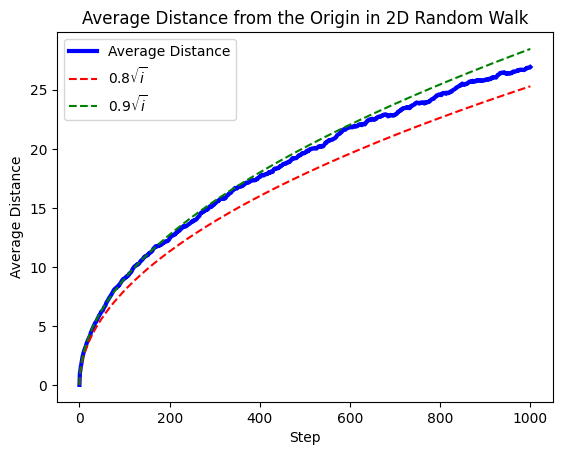

In [11]:
xs = np.linspace(0, 1000, 1001)
ys = random_walk_2d_average(1000, 500)
z1s = 0.8 * np.sqrt(xs)
z2s = 0.9 * np.sqrt(xs)

plt.plot(xs, ys, 'b', label = 'Average Distance', linewidth = 3)
plt.plot(xs, z1s, 'r--', label = '$0.8 \sqrt{i}$')
plt.plot(xs, z2s, 'g--', label = '$0.9 \sqrt{i}$')
plt.legend()
plt.title("Average Distance from the Origin in 2D Random Walk")
plt.xlabel("Step")
plt.ylabel("Average Distance")

# Submitting your project

Have you done all of the following things?

0. Included **all** minigroup members' student numbers at the top of this notebook.
1. Read through every exercise to check you have answered every part.
1. Carefully read and followed all of the [MATH0011 project instructions](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html).
2. Checked that all of the code in this notebook works correctly.

If you have, you're ready to submit.  One minigroup member only should download the completed notebook (in CoCalc, click the File menu next to the green Save button, then click Download) and submit it on the MATH0011 Moodle.  Please submit **only one file per minigroup.**